In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [15]:
End = '2020-04-01'

In [16]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [17]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [18]:
if Min_pozycja > Max_pozycja and Min_pozycja >= len(df1)-20:
    
    # Trend L1 spadkowy, liczony od połowy okresu
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=182))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Min_pozycja].name
    Ax = df1.iloc[Max_pozycja].name
    Ay = df1['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Max_pozycja].name
    By = df1['High'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']<=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['High'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']<=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Malejący')
            print('Max/Min:  W ostatnich 20 dniach')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - spadkowy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            X_long = [Ax, Bx]
            Y_long = [Ay, By]
            
    # Trend M1 - styczna pomocnicza od L1
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df1[A[0]:Max_idx]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df1[B[0]:Max_idx]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            
            print('TREND M1 - pomocniczy')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df21=df1[B[0]+1:Max_idx]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            X_mid1 = [Ax, Bx]
            Y_mid1 = [Ay, By]
            
    # Trend M2 - styczna od M1
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df31 = df1[A[0]:Max_idx]
    df31['Pozycja na LT'] = df31.index * a + b
    df31['check']= round(df31['High'] - df31['Pozycja na LT'],0)
    good = df31['check'][df31['check']<=0].count()
    sum = len(df31['check'])
    
    for i in range(len(df21)):
        
        df31=df1[B[0]:Max_idx]
        Bx = df31.iloc[0].name
        By = df31['High'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['High'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']<=0].count()
        sum = len(df31['check'])

        if good == sum:
            
            print('TREND M2')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df31=df1[B[0]+1:Max_idx]
            Bx = df31.iloc[0].name
            By = df31['High'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
            
            Cx = df1.index.max()+5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid2 = [Ax, Cx]
            Y_mid2 = [Ay, Cy]
    
    
      

Pierwszy trend:  Malejący
Max/Min:  W ostatnich 20 dniach
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - spadkowy
Punkt A:[18305.0, 10457.626953], Punkt B: [18311.0, 10191.675781]
------------------------------------------------------------------------------
TREND M1 - pomocniczy
Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego
Punkt A:[18311.0, 10191.675781], Punkt B: [18316.0, 9951.746094]
------------------------------------------------------------------------------
TREND M2
Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego
Punkt A:[18316.0, 9951.746094], Punkt B: [18328.0, 9163.220703]
------------------------------------------------------------------------------


In [19]:
df1.reset_index(inplace = True)

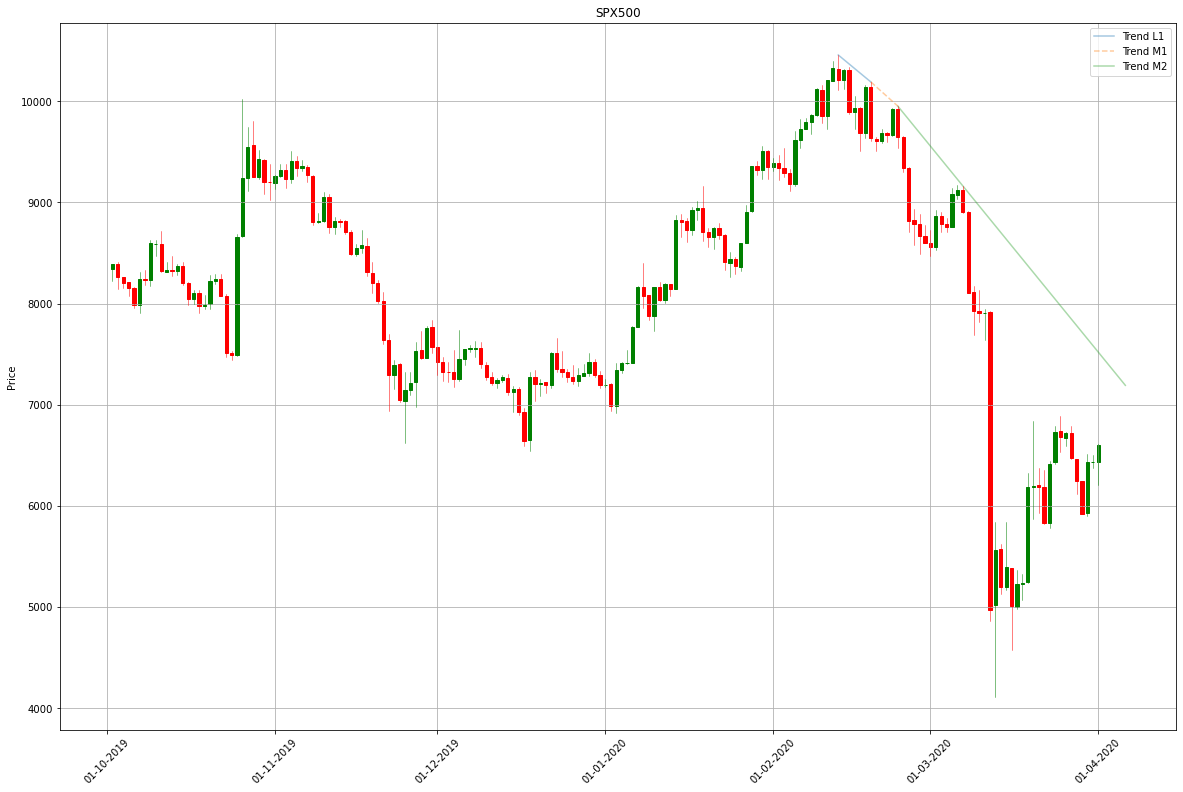

In [20]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax3.plot(X_mid1, Y_mid1, '--', label='Trend M1', alpha = 0.4)
ax3.plot(X_mid2, Y_mid2, label='Trend M2', alpha = 0.4)
plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()